In [1]:
### PSTH of neurons in regards to specific behaviors

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import os
import import_ipynb
import func_format
import func_analysis
from astropy.convolution import convolve, Gaussian1DKernel
import matplotlib.gridspec as gridspec
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

importing Jupyter notebook from func_format.ipynb
importing Jupyter notebook from func_analysis.ipynb


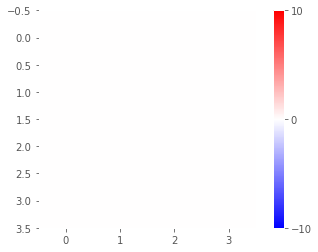

In [5]:
plt.imshow(np.zeros((4,4)), vmin = -10, vmax = 10, cmap = 'bwr')
plt.colorbar(ticks = (-10,0,10))

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('F:/colorbarfigure3.svg', format = 'svg',dpi = 500, transparent = True)

In [2]:
def sortplot_psthsummary(zscore):

    zscorevalues = np.array(zscore[:,4:], float)
    zscoreids = np.array(zscore[:,:4])

    sortorder = np.argsort(np.max(zscorevalues[:,1000:1200], axis = 1))
    sortedvalues = np.take_along_axis(zscorevalues, sortorder.reshape(len(sortorder), 1), axis = 0)
    
    sigrows_positive = np.where(zscorevalues[:,1000:1200] > 5)[0]
    sigids_positive = zscoreids[np.unique(sigrows_positive)]
    
    sigrows_negative = np.where(zscorevalues[:,1000:1200] < -5)[0]
    sigids_negative = zscoreids[np.unique(sigrows_negative)]

    fig, ax = plt.subplots(1, figsize = (3,3))

    ax.imshow(sortedvalues, aspect = 'auto', vmin = -10, vmax = 10, cmap = 'bwr')
    ax.set_ylim(0, len(sortorder))
    ax.grid(False)
    ax.set_ylabel('Neuron #')
    ax.set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000))
    ax.set_xticklabels((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax.set_xlabel('Time (s)')
    plt.tight_layout()
    #plt.show()
    
    return(fig, sigids_positive, sigids_negative)

In [4]:
results = np.zeros(8)
ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['13042019', '01102019', '27062020', '06072020']
behaviorlist = ['headhead', 'headtail', 'approach', 'following', 'conspecific']
behaviorrange = np.arange(2, 12, 2)
responsetype = np.loadtxt('F:/Classification/BLA_responsetype.csv', delimiter = ',', dtype = str)
savepath = 'F:/BLAClustering_baseall/'

headheadzscore = np.zeros(2003)
headtailzscore = np.zeros(2003)
approachzscore = np.zeros(2003)
conspecificzscore = np.zeros(2003)
followingzscore = np.zeros(2003)

psthresultssave = ['RatID', 'Date', 'Neuronname', 'Neurontype', 'Headhead', 'Headtail', 'Approach', 'Following', 'Conspecific']

for r, rat in enumerate(ratID):
    directory = os.listdir('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/')
    print(rat)
    for i, file in enumerate(directory):
        if file[-12:] == '_average.csv':
            neuronname = file[:-12]
            averagetrace = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/'+neuronname+'_average.csv', delimiter = ',', dtype = str)
            averagetrace = np.array(averagetrace[1:,1:], np.float)
            neurontype = responsetype[np.where((responsetype[:,0] == rat) & (responsetype[:,2] == neuronname))][0][4]
            behaviorresults = []
            
            if neurontype == 'nonsocial' or neurontype == 'food' or neurontype == 'object' or neurontype == 'nan':
                continue
            
            for j, behavior in enumerate(behaviorlist):
                
                actual = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/'+neuronname+'_'+behavior+'_rawvalues.csv', delimiter = ',')
                actual = convolve(np.sum(actual, axis = 0), Gaussian1DKernel(np.sqrt(50)), boundary = 'wrap')
                
                minimummax = np.max(averagetrace[behaviorrange[j]])
                if minimummax < 30:
                    save = np.hstack((rat, date[r], neuronname, neurontype, 'nan', 'nan', 'nan', 'nan', 'nan'))
                    behaviorresults = np.append(behaviorresults, 'no sig')
                    continue
                    
                if behavior == 'headhead':
                    zscoreheadhead = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    headheadzscore = np.vstack((headheadzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadhead))))
                    if np.max(zscoreheadhead[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreheadhead[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'headtail':
                    zscoreheadtail = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    headtailzscore = np.vstack((headtailzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadtail))))
                    if np.max(zscoreheadtail[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreheadtail[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'approach':
                    zscoreapproach = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    approachzscore = np.vstack((approachzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreapproach))))
                    if np.max(zscoreapproach[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreapproach[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'conspecific':
                    zscoreconspecific = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    conspecificzscore = np.vstack((conspecificzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreconspecific))))
                    if np.max(zscoreconspecific[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreconspecific[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'following':
                    zscorefollowing = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    followingzscore = np.vstack((followingzscore, np.hstack((rat, date[r], neuronname, neurontype, zscorefollowing))))
                    if np.max(zscorefollowing[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscorefollowing[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                        
            psthresultssave = np.vstack((psthresultssave, np.hstack((rat, date[r], neuronname, neurontype, behaviorresults))))
                    
                    
                    
headheadzscore = headheadzscore[1:]
headtailzscore = headtailzscore[1:]
approachzscore = approachzscore[1:]
conspecificzscore = conspecificzscore[1:]
followingzscore = followingzscore[1:]

Amygdala6
Amygdala8
Amygdala10
Amygdala11


In [5]:
np.savetxt(savepath+'summary_social.csv', psthresultssave, delimiter = ',', fmt = '%s')
savetype = 'social_'

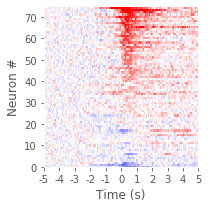

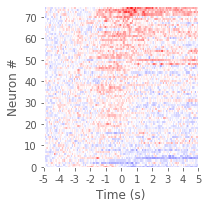

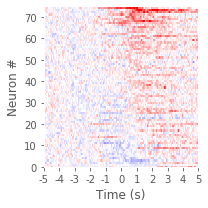

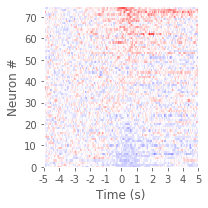

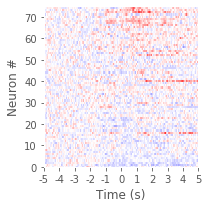

In [77]:
savepath = 'F:/Figure4/'
savetype = 'social_'

plt.rcParams['svg.fonttype'] = 'none'
[headheadfig, headheadsigids_positive, headheadsigids_negative] = sortplot_psthsummary(headheadzscore)
#headheadfig.savefig(savepath+savetype+'F4_headhead_zscore.png', dpi = 300)
headheadfig.savefig(savepath+savetype+'headhead_zscore.svg', format = 'svg', dpi = 500, transparent = True)
[headtailfig, headtailsigids_positive, headtailsigids_negative] = sortplot_psthsummary(headtailzscore)
#headtailfig.savefig(savepath+savetype+'F4_headtail_zscore.png', dpi = 300)
headtailfig.savefig(savepath+savetype+'headtail_zscore.svg', format = 'svg', dpi = 500, transparent = True)
[approachfig, approachsigids_positive, approachsigids_negative] = sortplot_psthsummary(approachzscore)
#approachfig.savefig(savepath+savetype+'F4_approach_zscore.png', dpi = 300)
approachfig.savefig(savepath+savetype+'approach_zscore.svg', format = 'svg', dpi = 500, transparent = True)
[followingfig, followingsigids_positive, followingsigids_negative] = sortplot_psthsummary(followingzscore)
#followingfig.savefig(savepath+savetype+'F4_following_zscore.png', dpi = 300)
followingfig.savefig(savepath+savetype+'following_zscore.svg', format = 'svg', dpi = 500, transparent = True)
[conspecificfig, conspecificids_positive, conspecificids_negative] = sortplot_psthsummary(conspecificzscore)
#conspecificfig.savefig(savepath+savetype+'F4_conspecific_zscore.png', dpi = 300)
conspecificfig.savefig(savepath+savetype+'conspecific_zscore.svg', format = 'svg', dpi = 500, transparent = True)

In [7]:
allunits = len(psthresultssave[1:,4])
headhead_pos = np.count_nonzero(psthresultssave[1:,4] == 'sig+')
headhead_neg = np.count_nonzero(psthresultssave[1:,4] == 'sig-')
headhead_no = (allunits - headhead_pos - headhead_neg)/allunits
headtail_pos = np.count_nonzero(psthresultssave[1:,5] == 'sig+')
headtail_neg = np.count_nonzero(psthresultssave[1:,5] == 'sig-')
headtail_no = (allunits - headtail_pos - headtail_neg)/allunits
approach_pos = np.count_nonzero(psthresultssave[1:,6] == 'sig+')
approach_neg = np.count_nonzero(psthresultssave[1:,6] == 'sig-')
approach_no = (allunits - approach_pos - approach_neg)/allunits
following_pos = np.count_nonzero(psthresultssave[1:,7] == 'sig+')
following_neg = np.count_nonzero(psthresultssave[1:,7] == 'sig-')
following_no = (allunits - following_pos - following_neg)/allunits
conspecific_pos = np.count_nonzero(psthresultssave[1:,8] == 'sig+')
conspecific_neg = np.count_nonzero(psthresultssave[1:,8] == 'sig-')
conspecific_no = (allunits - conspecific_pos - conspecific_neg)/allunits

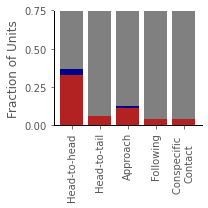

In [9]:
fig, ax = plt.subplots(1, figsize = (3,3))

ax.bar((0,1,2,3,4), (headhead_pos/allunits, headtail_pos/allunits, approach_pos/allunits, following_pos/allunits, conspecific_pos/allunits), color = 'firebrick')
ax.bar((0,1,2,3,4), (headhead_neg/allunits, headtail_neg/allunits, approach_neg/allunits, following_neg/allunits, conspecific_neg/allunits), 
      bottom = (headhead_pos/allunits, headtail_pos/allunits, approach_pos/allunits, following_pos/allunits, conspecific_pos/allunits), color = 'darkblue')
ax.bar((0,1,2,3,4), (headhead_no, headtail_no, approach_no, following_no, conspecific_no),
      bottom = (headhead_pos/allunits+headhead_neg/allunits, headtail_pos/allunits+headtail_neg/allunits, approach_pos/allunits+approach_neg/allunits, following_pos/allunits+following_neg/allunits, conspecific_pos/allunits+conspecific_neg/allunits), color = 'gray')

ax.set_ylim(0,.75)
ax.set_yticks((0, .25, .5, .75))
ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(('Head-to-head', 'Head-to-tail', 'Approach', 'Following', 'Conspecific \nContact'), rotation = 90)
ax.set_ylabel('Fraction of Units')
ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
plt.grid(False)
plt.tight_layout()
plt.savefig(savepath+'F5_Summary_'+savetype+'.png', dpi = 300)
#plt.savefig(savepath+'Summary_'+savetype+'.svg', format = 'svg', dpi = 500, transparent = True)

In [24]:
headheadmodulated = psthresultssave[psthresultssave[:,4] == 'sig+']
notheadheadmodulated = psthresultssave[psthresultssave[:,4] == 'no sig']

neuropix_xcoords = [43, 11, 59, 27]*96
neuropix_ycoords = np.sort(np.hstack(([np.arange(20, 3841, 20)]*2)))
neuropix_coords = np.transpose(np.vstack((neuropix_xcoords, neuropix_ycoords)))
neuronlist = np.loadtxt('D:/BLAClustering_baseall/BLA_responsetype_day1_baseall.csv', delimiter = ',', dtype = str)
ratID = np.array(['Amygdala3', 'Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11'])
aplocationtip = np.array([-3300, -3300, -3140, -2300, -2800])
mllocationtip = np.array([-5200, -4500, -5850, -5100, -5500])
dvlocationtip = np.array([-9700, -9900, -8650, -9200, -9100])

coords = np.zeros(3)
for i, neu in enumerate(neuronlist[:,2]):
    index = np.where(ratID == neuronlist[i][0])[0][0]
    location = neuropix_coords[np.int(neu[:-1])]
    
    ap = aplocationtip[index]+location[0]
    ml = mllocationtip[index]
    dv = dvlocationtip[index]+100+location[1]
    
    coords = np.vstack((coords, (ap, ml, dv)))
    
coords = coords[1:]

location = np.hstack((neuronlist, coords))

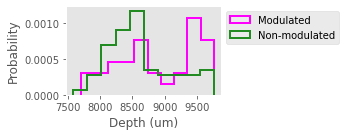

In [43]:


ap_modulated = []
dv_modulated = []

ap_nonmodulated = []
dv_nonmodulated = []

for i, ii in enumerate(headheadmodulated):
    
    neuron = np.ravel(location[np.where((ii[0] == location[:,0]) & (ii[2] == location[:,2]))])
    ap_modulated = np.append(ap_modulated, np.abs(np.float(neuron[-3])))
    dv_modulated = np.append(dv_modulated, np.abs(np.float(neuron[-1])))
    
for j, jj in enumerate(notheadheadmodulated):
    
    neuron = np.ravel(location[np.where((jj[0] == location[:,0]) & (jj[2] == location[:,2]))])
    ap_nonmodulated = np.append(ap_nonmodulated, np.abs(np.float(neuron[-3])))
    dv_nonmodulated = np.append(dv_nonmodulated, np.abs(np.float(neuron[-1])))
    
fig, ax = plt.subplots(1, figsize = (5,2))

ax.hist(dv_modulated, density = True, histtype = 'step', color = 'magenta', lw = 2)
ax.hist(dv_nonmodulated, density = True, histtype = 'step', color = 'forestgreen', lw = 2)
ax.legend(('Modulated', 'Non-modulated'), bbox_to_anchor = (1,1))

ax.set_ylabel('Probability')
ax.set_xlabel('Depth (um)')
plt.tight_layout()
plt.grid(False)
plt.savefig(savepath+'/F5_headheadmodulated_location_all.png', dpi = 300)
#plt.savefig(savepath+'/Headheadmodulated_location_all.png', dpi = 300)

In [15]:
### calculate results for all neurons

results = np.zeros(8)
ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['13042019', '01102019', '27062020', '06072020']
behaviorlist = ['headhead', 'headtail', 'approach', 'following', 'conspecific']
behaviorrange = np.arange(2, 12, 2)
responsetype = np.loadtxt('F:/BLAClustering_baseall/BLA_responsetype_day1_baseall.csv', delimiter = ',', dtype = str)
savepath = 'F:/BLAClustering_baseall/'

headheadzscore = np.zeros(2003)
headtailzscore = np.zeros(2003)
approachzscore = np.zeros(2003)
conspecificzscore = np.zeros(2003)
followingzscore = np.zeros(2003)

psthresultssave = ['RatID', 'Date', 'Neuronname', 'Neurontype', 'Headhead', 'Headtail', 'Approach', 'Following', 'Conspecific']

for r, rat in enumerate(ratID):
    directory = os.listdir('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/')
    print(rat)
    for i, file in enumerate(directory):
        if file[-12:] == '_average.csv':
            neuronname = file[:-12]
            averagetrace = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/'+neuronname+'_average.csv', delimiter = ',', dtype = str)
            averagetrace = np.array(averagetrace[1:,1:], np.float)
            neurontype = responsetype[np.where((responsetype[:,0] == rat) & (responsetype[:,2] == neuronname))][0][4]
            behaviorresults = []
            
            #if neurontype == 'nonsocial' or neurontype == 'food' or neurontype == 'object' or neurontype == 'nan':
                #continue
            
            for j, behavior in enumerate(behaviorlist):
                
                actual = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/'+neuronname+'_'+behavior+'_rawvalues.csv', delimiter = ',')
                actual = convolve(np.sum(actual, axis = 0), Gaussian1DKernel(np.sqrt(50)), boundary = 'wrap')
                
                minimummax = np.max(averagetrace[behaviorrange[j]])
                if minimummax < 30:
                    save = np.hstack((rat, date[r], neuronname, neurontype, 'nan', 'nan', 'nan', 'nan', 'nan'))
                    behaviorresults = np.append(behaviorresults, 'no sig')
                    continue
                    
                if behavior == 'headhead':
                    zscoreheadhead = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    headheadzscore = np.vstack((headheadzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadhead))))
                    if np.max(zscoreheadhead[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreheadhead[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'headtail':
                    zscoreheadtail = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    headtailzscore = np.vstack((headtailzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadtail))))
                    if np.max(zscoreheadtail[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreheadtail[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'approach':
                    zscoreapproach = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    approachzscore = np.vstack((approachzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreapproach))))
                    if np.max(zscoreapproach[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreapproach[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'conspecific':
                    zscoreconspecific = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    conspecificzscore = np.vstack((conspecificzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreconspecific))))
                    if np.max(zscoreconspecific[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreconspecific[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'following':
                    zscorefollowing = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    followingzscore = np.vstack((followingzscore, np.hstack((rat, date[r], neuronname, neurontype, zscorefollowing))))
                    if np.max(zscorefollowing[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscorefollowing[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                        
            psthresultssave = np.vstack((psthresultssave, np.hstack((rat, date[r], neuronname, neurontype, behaviorresults))))
                    
                    
                    
headheadzscore = headheadzscore[1:]
headtailzscore = headtailzscore[1:]
approachzscore = approachzscore[1:]
conspecificzscore = conspecificzscore[1:]
followingzscore = followingzscore[1:]

Amygdala6
Amygdala8
Amygdala10
Amygdala11


In [16]:
pancount_pos = 0
unicount_pos = 0
othercount_pos = 0

pancount_no = 0
unicount_no = 0
othercount_no = 0

pancount_neg = 0
unicount_neg = 0
othercount_neg = 0

for i, row in enumerate(psthresultssave[1:]):
    
    if np.count_nonzero(row[-5:] == 'sig+') > 0:
        
        if row[-6] == 'panresponsive':
            pancount_pos = pancount_pos + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_pos = unicount_pos + 1
        else:
            othercount_pos = othercount_pos + 1
            
    elif np.count_nonzero(row[-5:] == 'sig-') > 0:
        
        if row[-6] == 'panresponsive':
            pancount_neg = pancount_neg+1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_neg = unicount_neg + 1
        else:
            othercount_neg = othercount_neg + 1
            
    else:
        if row[-6] == 'panresponsive':
            pancount_no = pancount_no + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_no = unicount_no+1
        else:
            othercount_no = othercount_no+1
    

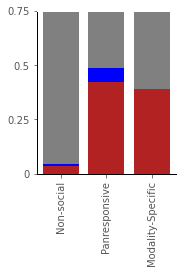

In [19]:
fig, ax = plt.subplots(1, figsize = (2.5, 3))

othertotal = othercount_pos+othercount_no+othercount_neg
pantotal = pancount_pos+pancount_no+pancount_neg
unitotal = unicount_pos+unicount_no+unicount_neg

ax.bar((0,1,2), (othercount_pos/othertotal, pancount_pos/pantotal, unicount_pos/unitotal), color = 'firebrick')
ax.bar((0,1,2), (othercount_neg/othertotal, pancount_neg/pantotal, unicount_neg/unitotal), color = 'blue', bottom = (othercount_pos/othertotal, pancount_pos/pantotal, unicount_pos/unitotal))

ax.bar((0,1,2), (othercount_no/othertotal, pancount_no/pantotal, unicount_no/unitotal), color = 'gray', bottom = ((othercount_pos+othercount_neg)/othertotal, (pancount_pos+pancount_neg)/pantotal, (unicount_pos+unicount_neg)/unitotal))

ax.grid(False)
ax.set_facecolor('white')
ax.set_xticks((0,1,2))
ax.set_xticklabels(('Non-social', 'Panresponsive', 'Modality-Specific'), rotation = 90)

ax.set_yticks((0,.25,.5,.75,1))
ax.set_yticklabels((0,.25,.5,.75,1))
ax.set_ylim(0,.75)
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig(savepath+'/F5_summary_neurontype_specificbehaviorresponse.png', dpi = 300)
plt.savefig('F:/Figure4/summary_neurontype_specificbehaviors.svg', format = 'svg', dpi = 500, transparent = True)

In [18]:
savepath

'F:/BLAClustering_baseall/'

In [43]:
results = np.zeros(8)
ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['13042019', '01102019', '27062020', '06072020']
behaviorlist = ['headhead', 'headtail', 'approach', 'following', 'conspecific']
behaviorrange = np.arange(2, 12, 2)
responsetype = np.loadtxt('F:/Classification/BLA_responsetype.csv', delimiter = ',', dtype = str)
savepath = 'F:/BLAClustering_baseall/'

headheadzscore = np.zeros(2003)
headtailzscore = np.zeros(2003)
approachzscore = np.zeros(2003)
conspecificzscore = np.zeros(2003)
followingzscore = np.zeros(2003)

psthresultssave = ['RatID', 'Date', 'Neuronname', 'Neurontype', 'Headhead', 'Headtail', 'Approach', 'Following', 'Conspecific']
lowneuroncount = 'no'

for r, rat in enumerate(ratID):
    directory = os.listdir('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/')
    print(rat)
    for i, file in enumerate(directory):
        if file[-12:] == '_average.csv':
            neuronname = file[:-12]
            averagetrace = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/'+neuronname+'_average.csv', delimiter = ',', dtype = str)
            averagetrace = np.array(averagetrace[1:,1:], np.float)
            neurontype = responsetype[np.where((responsetype[:,0] == rat) & (responsetype[:,2] == neuronname))][0][4]
            behaviorresults = []
            
            if neurontype == 'nonsocial' or neurontype == 'food' or neurontype == 'object' or neurontype == 'nan':
                continue
            
            for j, behavior in enumerate(behaviorlist):
                
                actual = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior_recalculate/'+neuronname+'_'+behavior+'_rawvalues.csv', delimiter = ',')
                actual = convolve(np.sum(actual, axis = 0), Gaussian1DKernel(np.sqrt(50)), boundary = 'wrap')
                
                minimummax = np.max(averagetrace[behaviorrange[j]])
                if minimummax < 30:
                    save = np.hstack((rat, date[r], neuronname, neurontype, 'nan', 'nan', 'nan', 'nan', 'nan'))
                    behaviorresults = np.append(behaviorresults, 'no sig')
                    lowneuroncount = 'yes'
                    
                if behavior == 'headhead':
                    zscoreheadhead = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    headheadzscore = np.vstack((headheadzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadhead))))
                    if lowneuroncount == 'yes':
                        continue
                    if np.max(zscoreheadhead[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreheadhead[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'headtail':
                    zscoreheadtail = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    headtailzscore = np.vstack((headtailzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadtail))))
                    if lowneuroncount == 'yes':
                        continue
                    if np.max(zscoreheadtail[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreheadtail[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'approach':
                    zscoreapproach = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    approachzscore = np.vstack((approachzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreapproach))))
                    if lowneuroncount == 'yes':
                        continue
                    if np.max(zscoreapproach[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreapproach[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'conspecific':
                    zscoreconspecific = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    conspecificzscore = np.vstack((conspecificzscore, np.hstack((rat, date[r], neuronname, neurontype, zscoreconspecific))))
                    if lowneuroncount == 'yes':
                        continue
                    if np.max(zscoreconspecific[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscoreconspecific[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                if behavior == 'following':
                    
                    zscorefollowing = (actual-np.mean(actual[:600])) / np.std(actual[:600])
                    followingzscore = np.vstack((followingzscore, np.hstack((rat, date[r], neuronname, neurontype, zscorefollowing))))
                    if lowneuroncount == 'yes':
                        continue
                    if np.max(zscorefollowing[1000:1200]) > 5:
                        behaviorresults = np.append(behaviorresults, 'sig+')
                    elif np.min(zscorefollowing[1000:1200]) < -5:
                        behaviorresults = np.append(behaviorresults, 'sig-')
                    else:
                        behaviorresults = np.append(behaviorresults, 'no sig')
                        
                lowneuroncount = 'no'
                        
            #psthresultssave = np.vstack((psthresultssave, np.hstack((rat, date[r], neuronname, neurontype, behaviorresults))))
                    
                    
                    
headheadzscore = headheadzscore[1:]
headtailzscore = headtailzscore[1:]
approachzscore = approachzscore[1:]
conspecificzscore = conspecificzscore[1:]
followingzscore = followingzscore[1:]

Amygdala6
Amygdala8
Amygdala10
Amygdala11


In [52]:
headheadzscorevalues = np.array(headheadzscore[:,4:], float)
headtailzscorevalues = np.array(headtailzscore[:,4:], float)
approachzscorevalues = np.array(approachzscore[:,4:], float)
followingzscorevalues = np.array(followingzscore[:,4:], float)
conspecificzscorevalues = np.array(conspecificzscore[:,4:], float)
headhead_sortorder = np.argsort(np.max(np.array(headheadzscore[:,4:][:,1000:1200], float), axis = 1))
headtail_sortorder = np.argsort(np.max(np.array(headtailzscore[:,4:][:,1000:1200], float), axis = 1))
approach_sortorder = np.argsort(np.max(np.array(approachzscore[:,4:][:,1000:1200], float), axis = 1))
following_sortorder = np.argsort(np.max(np.array(followingzscore[:,4:][:,1000:1200], float), axis = 1))
conspecific_sortorder = np.argsort(np.max(np.array(conspecificzscore[:,4:][:,1000:1200], float), axis = 1))

In [53]:
headhead_sorted_head = np.take_along_axis(headheadzscorevalues, headhead_sortorder.reshape(len(headhead_sortorder), 1), axis = 0)
headtail_sorted_head = np.take_along_axis(headtailzscorevalues, headhead_sortorder.reshape(len(headhead_sortorder), 1), axis = 0)
approach_sorted_head = np.take_along_axis(approachzscorevalues, headhead_sortorder.reshape(len(headhead_sortorder), 1), axis = 0)
following_sorted_head = np.take_along_axis(followingzscorevalues, headhead_sortorder.reshape(len(headhead_sortorder), 1), axis = 0)
conspecific_sorted_head = np.take_along_axis(conspecificzscorevalues, headhead_sortorder.reshape(len(headhead_sortorder), 1), axis = 0)

headhead_sorted_tail = np.take_along_axis(headheadzscorevalues, headtail_sortorder.reshape(len(headtail_sortorder), 1), axis = 0)
headtail_sorted_tail = np.take_along_axis(headtailzscorevalues, headtail_sortorder.reshape(len(headtail_sortorder), 1), axis = 0)
approach_sorted_tail = np.take_along_axis(approachzscorevalues, headtail_sortorder.reshape(len(headtail_sortorder), 1), axis = 0)
following_sorted_tail = np.take_along_axis(followingzscorevalues, headtail_sortorder.reshape(len(headtail_sortorder), 1), axis = 0)
conspecific_sorted_tail = np.take_along_axis(conspecificzscorevalues, headtail_sortorder.reshape(len(headtail_sortorder), 1), axis = 0)

headhead_sorted_approach = np.take_along_axis(headheadzscorevalues, approach_sortorder.reshape(len(approach_sortorder), 1), axis = 0)
headtail_sorted_approach = np.take_along_axis(headtailzscorevalues, approach_sortorder.reshape(len(approach_sortorder), 1), axis = 0)
approach_sorted_approach = np.take_along_axis(approachzscorevalues, approach_sortorder.reshape(len(approach_sortorder), 1), axis = 0)
following_sorted_approach = np.take_along_axis(followingzscorevalues, approach_sortorder.reshape(len(approach_sortorder), 1), axis = 0)
conspecific_sorted_approach = np.take_along_axis(conspecificzscorevalues, approach_sortorder.reshape(len(approach_sortorder), 1), axis = 0)

headhead_sorted_following = np.take_along_axis(headheadzscorevalues, following_sortorder.reshape(len(following_sortorder), 1), axis = 0)
headtail_sorted_following = np.take_along_axis(headtailzscorevalues, following_sortorder.reshape(len(following_sortorder), 1), axis = 0)
approach_sorted_following = np.take_along_axis(approachzscorevalues, following_sortorder.reshape(len(following_sortorder), 1), axis = 0)
following_sorted_following = np.take_along_axis(followingzscorevalues, following_sortorder.reshape(len(following_sortorder), 1), axis = 0)
conspecific_sorted_following = np.take_along_axis(conspecificzscorevalues, following_sortorder.reshape(len(following_sortorder), 1), axis = 0)

headhead_sorted_conspecific = np.take_along_axis(headheadzscorevalues, conspecific_sortorder.reshape(len(conspecific_sortorder), 1), axis = 0)
headtail_sorted_conspecific = np.take_along_axis(headtailzscorevalues, conspecific_sortorder.reshape(len(conspecific_sortorder), 1), axis = 0)
approach_sorted_conspecific = np.take_along_axis(approachzscorevalues, conspecific_sortorder.reshape(len(conspecific_sortorder), 1), axis = 0)
following_sorted_conspecific = np.take_along_axis(followingzscorevalues, conspecific_sortorder.reshape(len(conspecific_sortorder), 1), axis = 0)
conspecific_sorted_conspecific = np.take_along_axis(conspecificzscorevalues, conspecific_sortorder.reshape(len(conspecific_sortorder), 1), axis = 0)

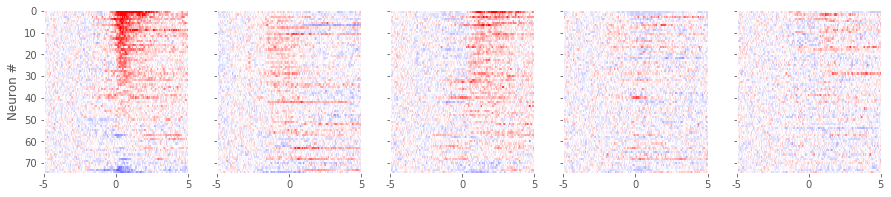

In [78]:
fig, ax = plt.subplots(1,5, figsize = (15,3), sharex = True, sharey = True)

ax[0].imshow(np.flip(headhead_sorted_head, axis = 0), aspect = 'auto', vmin = -10, vmax = 10, cmap = 'bwr')
ax[0].grid(False)

ax[1].imshow(np.flip(headtail_sorted_head, axis = 0), aspect = 'auto', vmin = -10, vmax = 10, cmap = 'bwr')
ax[1].grid(False)

ax[2].imshow(np.flip(approach_sorted_head,axis = 0), aspect = 'auto', vmin = -10, vmax = 10, cmap = 'bwr')
ax[2].grid(False)

ax[3].imshow(np.flip(following_sorted_head, axis = 0), aspect = 'auto', vmin = -10, vmax = 10, cmap = 'bwr')
ax[3].grid(False)

ax[4].imshow(np.flip(conspecific_sorted_head, axis = 0), aspect = 'auto', vmin = -10, vmax = 10, cmap = 'bwr')
ax[4].grid(False)

ax[0].set_xticks((0, 1000, 2000))
ax[0].set_xticklabels((-5, 0, 5))
ax[0].set_xlim(0,2000)
ax[0].set_ylabel('Neuron #')

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('F:/Figure4/F4_headhead_zscore_sortedheadhead.svg', format = 'svg', dpi = 500, transparent = True)

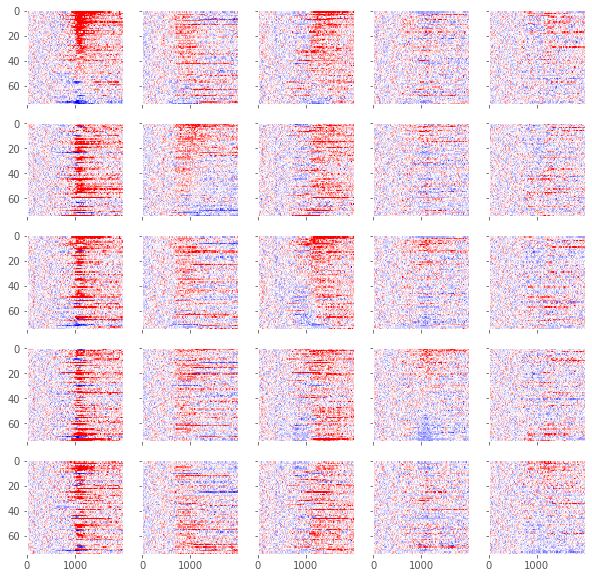

In [59]:
fig, ax = plt.subplots(1,5, figsize = (10,10), sharex = True, sharey = True)

ax[0,0].imshow(np.flip(headhead_sorted_head, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[0,0].grid(False)

ax[0,1].imshow(np.flip(headtail_sorted_head, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[0,1].grid(False)

ax[0,2].imshow(np.flip(approach_sorted_head,axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[0,2].grid(False)

ax[0,3].imshow(np.flip(following_sorted_head, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[0,3].grid(False)

ax[0,4].imshow(np.flip(conspecific_sorted_head, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[0,4].grid(False)

ax[1,0].imshow(np.flip(headhead_sorted_tail, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[1,0].grid(False)

ax[1,1].imshow(np.flip(headtail_sorted_tail, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[1,1].grid(False)

ax[1,2].imshow(np.flip(approach_sorted_tail,axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[1,2].grid(False)

ax[1,3].imshow(np.flip(following_sorted_tail, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[1,3].grid(False)

ax[1,4].imshow(np.flip(conspecific_sorted_tail, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[1,4].grid(False)

ax[2,0].imshow(np.flip(headhead_sorted_approach, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[2,0].grid(False)

ax[2,1].imshow(np.flip(headtail_sorted_approach, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[2,1].grid(False)

ax[2,2].imshow(np.flip(approach_sorted_approach,axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[2,2].grid(False)

ax[2,3].imshow(np.flip(following_sorted_approach, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[2,3].grid(False)

ax[2,4].imshow(np.flip(conspecific_sorted_approach, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[2,4].grid(False)

ax[3,0].imshow(np.flip(headhead_sorted_following, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[3,0].grid(False)

ax[3,1].imshow(np.flip(headtail_sorted_following, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[3,1].grid(False)

ax[3,2].imshow(np.flip(approach_sorted_following,axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[3,2].grid(False)

ax[3,3].imshow(np.flip(following_sorted_following, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[3,3].grid(False)

ax[3,4].imshow(np.flip(conspecific_sorted_following, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[3,4].grid(False)

ax[4,0].imshow(np.flip(headhead_sorted_conspecific, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[4,0].grid(False)

ax[4,1].imshow(np.flip(headtail_sorted_conspecific, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[4,1].grid(False)

ax[4,2].imshow(np.flip(approach_sorted_conspecific,axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[4,2].grid(False)

ax[4,3].imshow(np.flip(following_sorted_conspecific, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[4,3].grid(False)

ax[4,4].imshow(np.flip(conspecific_sorted_conspecific, axis = 0), aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr')
ax[4,4].grid(False)

In [ ]:
def sortplot_psthsummary(zscore):

    zscorevalues = np.array(zscore[:,4:], float)
    zscoreids = np.array(zscore[:,:4])

    sortorder = np.argsort(np.max(zscorevalues[:,1000:1200], axis = 1))
    sortedvalues = np.take_along_axis(zscorevalues, sortorder.reshape(len(sortorder), 1), axis = 0)
    
    sigrows_positive = np.where(zscorevalues[:,1000:1200] > 5)[0]
    sigids_positive = zscoreids[np.unique(sigrows_positive)]
    
    sigrows_negative = np.where(zscorevalues[:,1000:1200] < -5)[0]
    sigids_negative = zscoreids[np.unique(sigrows_negative)]

    fig, ax = plt.subplots(1, figsize = (3,3))

    ax.imshow(sortedvalues, aspect = 'auto', vmin = -10, vmax = 10, cmap = 'bwr')
    ax.set_ylim(0, len(sortorder))
    ax.grid(False)
    ax.set_ylabel('Neuron #')
    ax.set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000))
    ax.set_xticklabels((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax.set_xlabel('Time (s)')
    plt.tight_layout()
    #plt.show()
    
    return(fig, sigids_positive, sigids_negative)